In [15]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "last"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


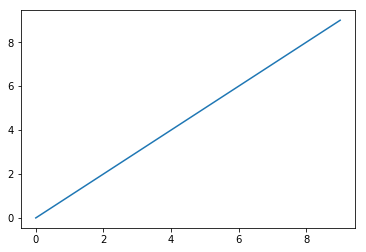

In [16]:
data = np.arange(10)
data
plt.plot(data)

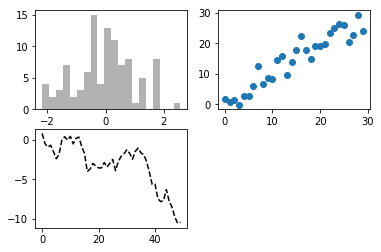

In [17]:
# figures and subplots
"""
plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure
"""
fig = plt.figure()  # figsize will set certain size
ax1 = fig.add_subplot(2, 2, 1)  # figure should be 2X2 and ax1 is the first of four subplots
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
"""
When you issue a plotting command like plt.plot([1.5, 3.5, -2, 1.6]), matplotlib
draws on the last figure and subplot used (creating one if necessary), thus hiding
the figure and subplot creation
"""
# 'k--' is a style option instructing matplotlib to plot a black dashed line
plt.plot(np.random.randn(50).cumsum(), 'k--')
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

(array([ 4.,  1.,  5.,  3.,  8.,  8.,  6., 10., 16.,  5.,  7.,  7.,  6.,
         6.,  3.,  1.,  2.,  1.,  0.,  1.]),
 array([-2.28810482, -2.02022475, -1.75234469, -1.48446463, -1.21658457,
        -0.9487045 , -0.68082444, -0.41294438, -0.14506432,  0.12281575,
         0.39069581,  0.65857587,  0.92645593,  1.194336  ,  1.46221606,
         1.73009612,  1.99797619,  2.26585625,  2.53373631,  2.80161637,
         3.06949644]),
 <a list of 20 Patch objects>)

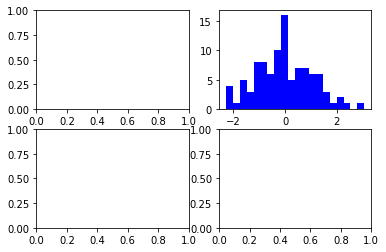

In [18]:
# plt.subplots, that creates a new figure and returns a NumPy array containing the created subplot objects
fig, axes = plt.subplots(2, 2)
axes
axes[0][1].hist(np.random.randn(100), bins=20, color='blue')

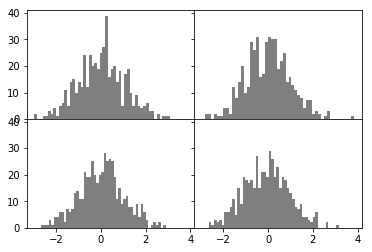

In [19]:
# adjusting the spacing around the subplots
# sharex: all subplots should use the same x-axis ticks
# sharey: all subplots should use the same y-axis ticks
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
# shrink the spacing all the way to zero
plt.subplots_adjust(wspace=0, hspace=0)

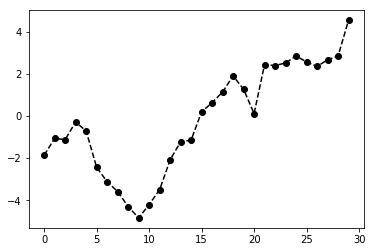

In [26]:
# colors, markers, and line styles
plt.plot(np.random.randn(30).cumsum(), 'ko--')  # k: color(black), o: marker(circle), --: linestyle(dashed)
# plt.plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

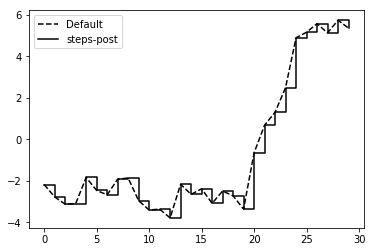

In [27]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label="Default")
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')
# we are able to create a plot legend to identify each line using plt.legend